In [1]:
import numpy as np
import pandas as pd
import zipfile

In [3]:
with zipfile.ZipFile('deliveries.csv.zip', 'r') as zip_ref:
    zip_ref.extract('deliveries.csv')
delivery = pd.read_csv('deliveries.csv')
match=pd.read_csv('matches.csv')

In [5]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [11]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [13]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [15]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
teams=[
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [19]:
match_df['team1']= match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']= match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']= match_df['team1'].str.replace('Deccan Charges','Sunrisers Hyderabad')
match_df['team1']= match_df['team1'].str.replace('Deccan Charges','Sunrisers Hyderabad')

In [21]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [23]:
match_df=match_df[match_df['dl_applied']==0]

In [25]:
match_df= match_df[['match_id','city','winner','total_runs']]

In [27]:
delivery_df=match_df.merge(delivery,on='match_id')

In [29]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [31]:
delivery_df.shape

(64192, 24)

In [33]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [35]:
delivery_df['runs_left']= delivery_df['total_runs_x']-delivery_df['current_score']

In [37]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [39]:
delivery_df['balla_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [41]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balla_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [45]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0).apply(lambda x: 1 if x != 0 else 0)
delivery_df['cumsum_wickets'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets_left'] = 10 - delivery_df['cumsum_wickets']




In [47]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balla_left,cumsum_wickets,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,0,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,0,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,117,0,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,204,116,0,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,200,115,0,10


In [51]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balla_left'])

In [53]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balla_left']

In [55]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balla_left,cumsum_wickets,wickets_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,0,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,0,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,0,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,0,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,0,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,5,7.862069,0.000000
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,5,7.897436,-4.000000
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,6,4,7.881356,-9.000000
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,6,4,7.915966,-30.000000


In [57]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [59]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [65]:
final_df= delivery_df[['batting_team','bowling_team','city','runs_left','balla_left','wickets_left','total_runs_x','crr','rrr','result']]

In [67]:
final_df = final_df.sample(final_df.shape[0])

In [69]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balla_left,wickets_left,total_runs_x,crr,rrr,result
59037,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,29,33,8,152,8.482759,5.272727,1


In [89]:
final_df.dropna(inplace=True)

In [101]:
final_df=final_df[final_df['balla_left']!=0]

In [103]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [105]:
X_train

,batting_team,bowling_team,city,runs_left,balla_left,wickets_left,total_runs_x,crr,rrr
90156,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,24,5,2,150,6.573913,28.800000
121694,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,145,108,10,164,9.500000,8.055556
20953,Kings XI Punjab,Kolkata Knight Riders,Port Elizabeth,110,92,9,153,9.214286,7.173913
123426,Kolkata Knight Riders,Rajasthan Royals,Jaipur,89,87,10,150,11.090909,6.137931
5068,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,115,102,8,138,7.666667,6.764706
...,...,...,...,...,...,...,...,...,...
32679,Royal Challengers Bangalore,Delhi Daredevils,Delhi,66,26,6,184,7.531915,15.230769
71522,Delhi Daredevils,Chennai Super Kings,Abu Dhabi,171,113,10,177,5.142857,9.079646
130749,Kolkata Knight Riders,Kings XI Punjab,Mohali,80,52,8,186,9.352941,9.230769
81711,Delhi Daredevils,Mumbai Indians,Mumbai,103,52,7,173,6.176471,11.884615


In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [111]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [113]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [115]:
y_pred=pipe.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8096746100862956

In [119]:
def match_summary(row):
    print("Batting Team-"+ row['batting_team']+" | Bowling Team-" + row['bowling_team']+ " | Target- " + str(row['total_runs_x']))

In [133]:
import numpy as np

def match_progression(x_df, match_id, pipe):
    # Filter data for the specified match and overs
    match = x_df[(x_df['match_id'] == match_id) & (x_df['ball'] == 6)]
    
    # Select necessary columns and drop rows with missing values
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 
                     'balla_left', 'wickets_left', 'total_runs_x', 
                     'crr', 'rrr']].dropna()
    
    # Exclude overs where balls_left is zero
    temp_df = temp_df[temp_df['balla_left'] != 0]
    
    if temp_df.empty:
        raise ValueError("No valid data after filtering for the specified match_id.")
    
    # Predict probabilities using the pipeline
    probabilities = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(probabilities[:, 0] * 100, 1)
    temp_df['win'] = np.round(probabilities[:, 1] * 100, 1)
    
    # Add progression details
    temp_df['end_of_over'] = np.arange(1, len(temp_df) + 1)
    target = temp_df['total_runs_x'].iloc[0]
    
    # Calculate runs scored in each over
    runs_left = temp_df['runs_left'].values
    runs_after_over = np.diff(np.insert(runs_left, 0, target))  # Insert target at the beginning
    temp_df['runs_after_over'] = -runs_after_over  # Negative sign for runs scored
    
    # Calculate wickets lost in each over
    wickets_left = temp_df['wickets_left'].values
    wickets_after_over = np.diff(np.insert(wickets_left, 0, 10))  # Insert 10 wickets at the beginning
    temp_df['wickets_in_over'] = -wickets_after_over  # Negative sign for wickets lost
    
    # Finalize the dataframe
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    
    print("Target:", target)
    return temp_df, target



In [135]:
temp_df, target = match_progression(delivery_df, match_id=74, pipe=pipe)
temp_df

Target: 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
9564,1,4,0,63.0,37.0
9572,2,8,0,58.1,41.9
9578,3,1,0,64.4,35.6
9584,4,7,1,74.9,25.1
9590,5,12,0,65.9,34.1
9596,6,13,0,54.3,45.7
9602,7,9,0,48.5,51.5
9610,8,15,0,34.0,66.0
9616,9,7,0,31.6,68.4
9623,10,17,0,18.2,81.8


Text(0.5, 1.0, 'Target-178')

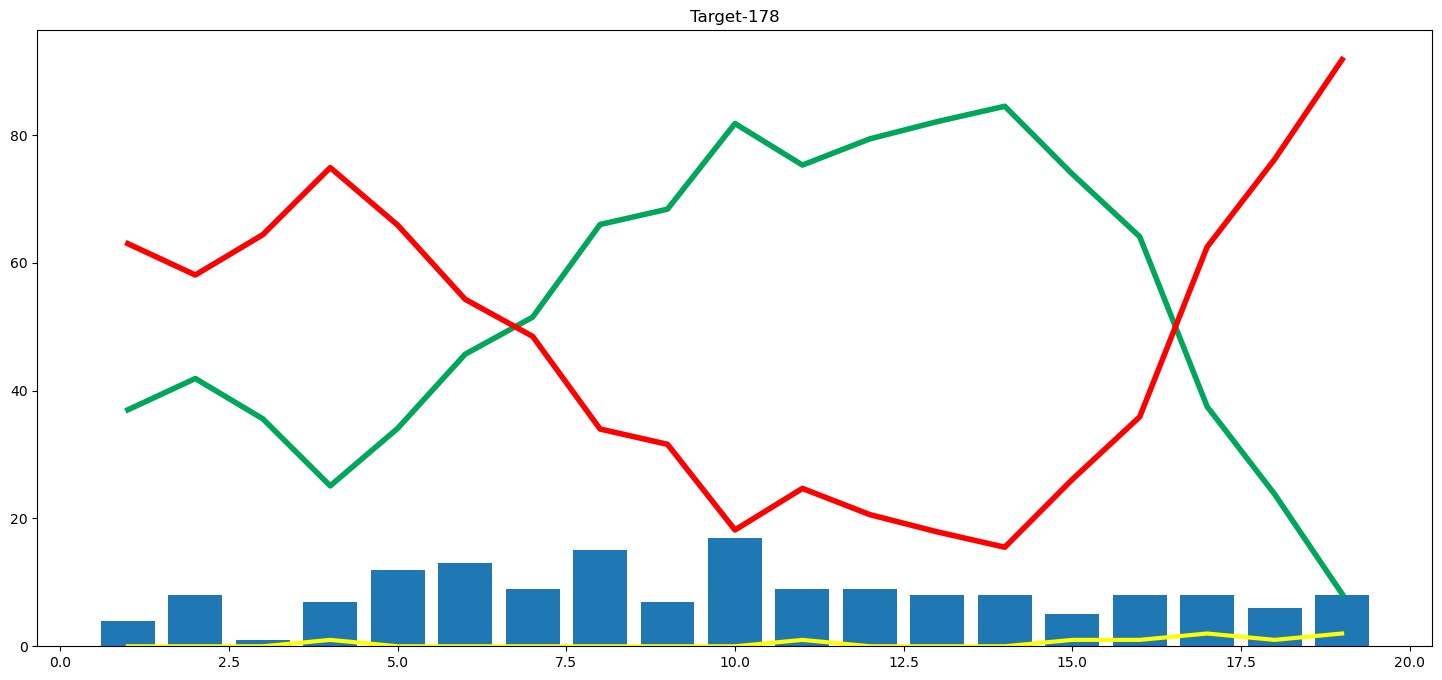

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [139]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [141]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Dharamsala', 'Pune', 'Raipur',
       'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Cuttack', 'Visakhapatnam',
       'Mohali', 'Bengaluru'], dtype=object)

In [145]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))